In [1]:
import numpy as np
import tensorflow as tf
import os

# plotting pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# Helper to make the output consistent
SEED = 42
def reset_graph(seed=SEED):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# set log level to supress messages, unless an error
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# Check TensorFlow version
print('TensorFlow Version: {}'.format(tf.__version__))

# Check if using GPU
if not tf.test.gpu_device_name():
    print('No GPU found')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
    
reset_graph()

TensorFlow Version: 1.6.0-dev20180105
No GPU found


In [16]:
X_RANGE_L = -5
X_RANGE_U = 5
Y_RANGE_L = -5
Y_RANGE_U = 5
NUM_POINTS = 100
IN_DATA = np.linspace(X_RANGE_L, X_RANGE_U, NUM_POINTS)
IN_DATA_10 = np.linspace(X_RANGE_L*2, X_RANGE_U*2, NUM_POINTS*2)

In [3]:
def plot_data(name, in_data, out_data):
    marker_color = '#52BDFF'
    plt.plot(in_data, out_data, c=marker_color, linewidth=4)
    plt.grid(True)
    plt.title(name, fontsize=14)

    plt.show()

## Smooth nonlinearities

### Sigmoid

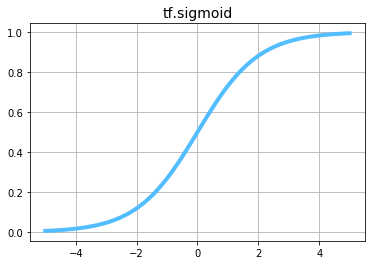

In [23]:
# {{{act_smooth_sigmoid}}}
reset_graph()

# graph
in_val = tf.placeholder(tf.float32, shape=[None])
act_func_out = tf.sigmoid(in_val)

# input
feed = {in_val: IN_DATA}

with tf.Session() as sess:
    out_data = sess.run(act_func_out, feed_dict=feed)

plot_data("tf.sigmoid", IN_DATA, out_data)

### hyperbolic tangent

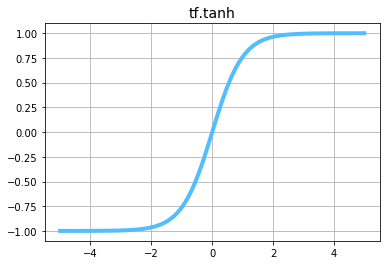

In [24]:
# {{{act_smooth_tangent}}}
reset_graph()

# graph
in_val = tf.placeholder(tf.float32, shape=[None])
act_func_out = tf.tanh(in_val)

# input
feed = {in_val: IN_DATA}

with tf.Session() as sess:
    out_data = sess.run(act_func_out, feed_dict=feed)

plot_data("tf.tanh", IN_DATA, out_data)

### Exponential Linear Units
https://arxiv.org/abs/1511.07289

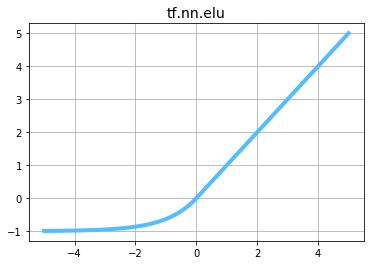

In [13]:
# {{{act_smooth_elu}}}
reset_graph()

# graph
in_val = tf.placeholder(tf.float32, shape=[None])
act_func_out = tf.nn.elu(in_val)

# input
feed = {in_val: IN_DATA}

with tf.Session() as sess:
    out_data = sess.run(act_func_out, feed_dict=feed)

plot_data("tf.nn.elu", IN_DATA, out_data)

### Self Normalizing Neural network
https://arxiv.org/abs/1706.02515

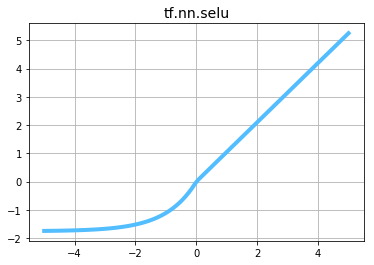

In [15]:
# {{{act_smooth_selu}}}
reset_graph()

# graph
in_val = tf.placeholder(tf.float32, shape=[None])
act_func_out = tf.nn.selu(in_val)

# input
feed = {in_val: IN_DATA}

with tf.Session() as sess:
    out_data = sess.run(act_func_out, feed_dict=feed)

plot_data("tf.nn.selu", IN_DATA, out_data)

### Softplus
`log(exp(features) + 1)`

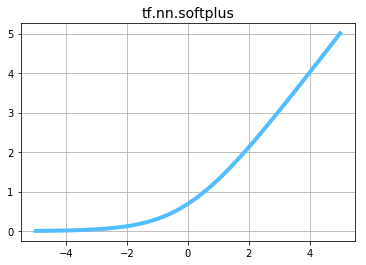

In [10]:
# {{{act_smooth_softplus}}}
reset_graph()

# graph
in_val = tf.placeholder(tf.float32, shape=[None])
act_func_out = tf.nn.softplus(in_val)

# input
feed = {in_val: IN_DATA}

with tf.Session() as sess:
    out_data = sess.run(act_func_out, feed_dict=feed)

plot_data("tf.nn.softplus", IN_DATA, out_data)

### Softsign
`features / (abs(features) + 1).`

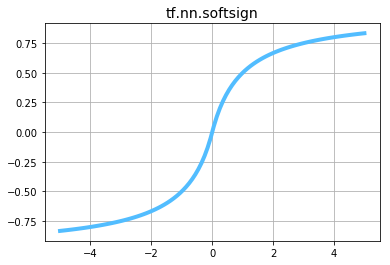

In [11]:
# {{{act_smooth_softsign}}}
reset_graph()

# graph
in_val = tf.placeholder(tf.float32, shape=[None])
act_func_out = tf.nn.softsign(in_val)

# input
feed = {in_val: IN_DATA}

with tf.Session() as sess:
    out_data = sess.run(act_func_out, feed_dict=feed)

plot_data("tf.nn.softsign", IN_DATA, out_data)

## Continuous but not differentiable at every location

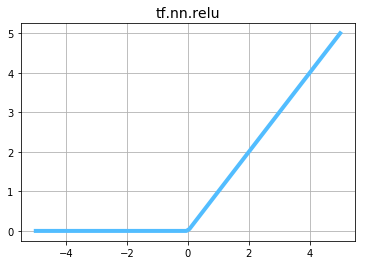

In [28]:
# {{{act_notsmooth_relu}}}
reset_graph()

# graph
in_val = tf.placeholder(tf.float32, shape=[None])
act_func_out = tf.nn.relu(in_val)

# input
feed = {in_val: IN_DATA}

with tf.Session() as sess:
    out_data = sess.run(act_func_out, feed_dict=feed)

plot_data("tf.nn.relu", IN_DATA, out_data)

### Leaky RELU
"Rectifier Nonlinearities Improve Neural Network Acoustic Models" AL Maas, AY Hannun, AY Ng - Proc. ICML, 2013 http://web.stanford.edu/~awni/papers/relu_hybrid_icml2013_final.pdf

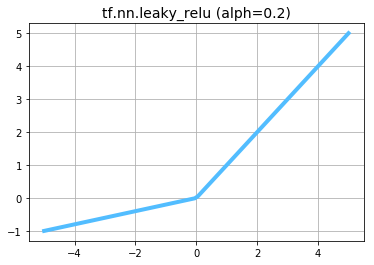

In [11]:
# {{{act_notsmooth_leakyrelu}}}
reset_graph()

# graph
in_val = tf.placeholder(tf.float32, shape=[None])
act_func_out = tf.nn.leaky_relu(in_val, alpha=0.2)

# input
feed = {in_val: IN_DATA}

with tf.Session() as sess:
    out_data = sess.run(act_func_out, feed_dict=feed)

plot_data("tf.nn.leaky_relu (alph=0.2)", IN_DATA, out_data)

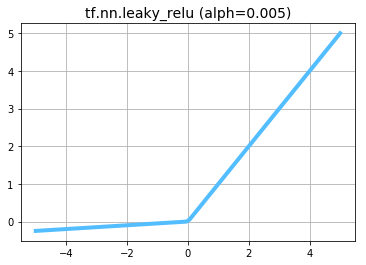

In [32]:
reset_graph()

# graph
in_val = tf.placeholder(tf.float32, shape=[None])
act_func_out = tf.nn.leaky_relu(in_val, alpha=0.05)

# input
feed = {in_val: IN_DATA}

with tf.Session() as sess:
    out_data = sess.run(act_func_out, feed_dict=feed)

plot_data("tf.nn.leaky_relu (alph=0.005)", IN_DATA, out_data)

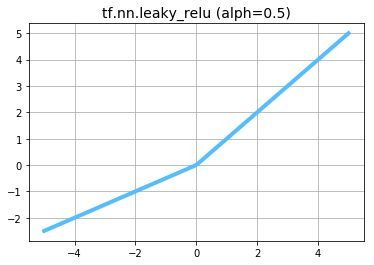

In [34]:
# graph
in_val = tf.placeholder(tf.float32, shape=[None])
act_func_out = tf.nn.leaky_relu(in_val, alpha=0.5)

# input
feed = {in_val: IN_DATA}

with tf.Session() as sess:
    out_data = sess.run(act_func_out, feed_dict=feed)

plot_data("tf.nn.leaky_relu (alph=0.5)", IN_DATA, out_data)

### relu6
http://www.cs.utoronto.ca/~kriz/conv-cifar10-aug2010.pdf

comments:
https://stackoverflow.com/questions/47220595/why-the-6-in-relu6

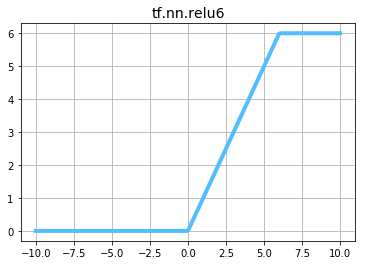

In [20]:
# {{{act_notsmooth_relu6}}}
reset_graph()

# graph
in_val = tf.placeholder(tf.float32, shape=[None])
act_func_out = tf.nn.relu6(in_val)

# input
feed = {in_val: IN_DATA_10}

with tf.Session() as sess:
    out_data = sess.run(act_func_out, feed_dict=feed)

plot_data("tf.nn.relu6", IN_DATA_10, out_data)

## Unconfirmed

### parametric relu
https://arxiv.org/pdf/1502.01852v1.pdf

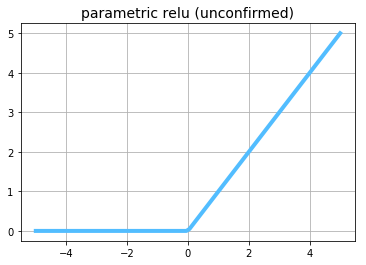

In [47]:
# {{{act_notsmooth_prelu}}}
def parametric_relu(_x):
    alphas = tf.get_variable('alpha', _x.get_shape()[-1],
                       initializer=tf.constant_initializer(0.0),
                        dtype=tf.float32)
    pos = tf.nn.relu(_x)
    neg = alphas * (_x - abs(_x)) * 0.5

    return pos + neg


reset_graph()

# graph
in_val = tf.placeholder(tf.float32, shape=[len(IN_DATA)])
act_func_out = parametric_relu(in_val)

# input
feed = {in_val: IN_DATA}

with tf.Session() as sess:
    sess.run(tf.local_variables_initializer())
    sess.run(tf.global_variables_initializer())
    out_data = sess.run(act_func_out, feed_dict=feed)

plot_data("parametric relu (unconfirmed)", IN_DATA, out_data)

* crelu
* hard_sigmoid - https://www.quora.com/What-is-hard-sigmoid-in-artificial-neural-networks-Why-is-it-faster-than-standard-sigmoid-Are-there-any-disadvantages-over-the-standard-sigmoid
* linear